In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
img = cv.imread('download.jpeg',cv.IMREAD_GRAYSCALE)
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

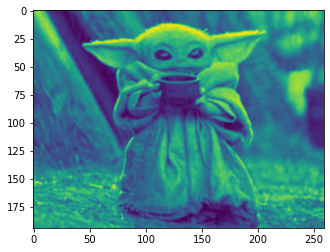

In [3]:
plt.imshow(img, interpolation = 'bicubic')

In [4]:
# cap = cv.VideoCapture(0)
# fourcc = cv.VideoWriter_fourcc(*'XVID')
# out = cv.VideoWriter('output.avi',fourcc, 20.0, (640,480))
# while True:
#     ret, frame = cap.read()
#     gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
#     out.write(frame)
#     cv.imshow('frame',frame)
#     cv.imshow('gray',gray)
#     if cv.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# out.release()
# cv.destroyAllWindows()

In [5]:
img = cv.imread('download.jpeg',cv.IMREAD_COLOR)
cv.line(img,(0,0),(50,85),(255,255,255),5)
cv.rectangle(img,(10,20),(100,50),(0,0,255),5)
cv.circle(img,(50,50), 20, (0,255,0), -1)
pts = np.array([[10,50],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img, [pts], True, (0,255,255), 3)
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV Tuts!',(10,50), font, 1, (200,255,155), 5, cv.LINE_AA)
cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
img = cv.imread('download.jpeg',cv.IMREAD_COLOR)

# # Now, we can reference specific pixels, like so:
# px = img[55,55]

# # Next, we could actually change a pixel:
# img[55,55] = [255,255,255]

# # It should be different now. Next, we can reference an ROI, or Region of Image, like so:
# px = img[100:150,100:150]
# print(px)

# # We can also modify the ROI, like this:
# img[100:150,100:150] = [255,255,255]

yoda = img[37:111,107:194]
img[0:74,0:87] = yoda

cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

In [7]:
img1 = cv.imread('3D-Matplotlib.png')
img2 = cv.imread('mainsvmimage.png')

add = img1+img2

cv.imshow('add',add)
cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
add = cv.add(img1,img2)
cv.imshow('add',add)
cv.waitKey(0)
cv.destroyAllWindows()
"""
Probably not the ideal here either. We can see that much of the image is very "white." 
This is because colors are 0-255, where 255 is "full light." 
Thus, for example: (155,211,79) + (50, 170, 200) = 205, 381, 279...translated to (205, 255,255).
"""

'\nProbably not the ideal here either. We can see that much of the image is very "white." \nThis is because colors are 0-255, where 255 is "full light." \nThus, for example: (155,211,79) + (50, 170, 200) = 205, 381, 279...translated to (205, 255,255).\n'

In [9]:
img1 = cv.imread('3D-Matplotlib.png')
img2 = cv.imread('mainsvmimage.png')

weighted = cv.addWeighted(img1, 0.6, img2, 0.4, 0)
cv.imshow('weighted',weighted)
cv.waitKey(0)
cv.destroyAllWindows()

In [10]:
img1 = cv.imread('3D-Matplotlib.png')
img2 = cv.imread('mainlogo.png')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

# add a threshold
ret, mask = cv.threshold(img2gray, 220, 255, cv.THRESH_BINARY_INV)

mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv.imshow('res',img1)
cv.imshow('img1_bg',img1_bg)
cv.imshow('img2_fg',img2_fg)
cv.waitKey(0)
cv.destroyAllWindows()

In [11]:
img = cv.imread('bookpage.jpg')
retval, threshold = cv.threshold(img, 12, 255, cv.THRESH_BINARY)
cv.imshow('original',img)
cv.imshow('threshold',threshold)
cv.waitKey(0)
cv.destroyAllWindows()

In [12]:
grayscaled = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
retval, threshold = cv.threshold(grayscaled, 10, 255, cv.THRESH_BINARY)
cv.imshow('original',img)
cv.imshow('threshold',threshold)
cv.waitKey(0)
cv.destroyAllWindows()

In [13]:
th = cv.adaptiveThreshold(grayscaled, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 115, 1)
cv.imshow('original',img)
cv.imshow('Adaptive threshold',th)
cv.waitKey(0)
cv.destroyAllWindows()

In [14]:
# retval2,threshold2 = cv.threshold(grayscaled,125,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# cv.imshow('original',img)
# cv.imshow('Otsu threshold',threshold2)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [15]:
cap = cv.VideoCapture(0)

while(1):
    _, frame = cap.read()
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv.inRange(hsv, lower_red, upper_red)
    res = cv.bitwise_and(frame,frame, mask= mask)

    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cv.destroyAllWindows()
cap.release()

In [16]:
# Blur and smooth

cap = cv.VideoCapture(0)

while(1):
    _, frame = cap.read()
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv.inRange(hsv, lower_red, upper_red)
    res = cv.bitwise_and(frame,frame, mask= mask)
    
    kernel = np.ones((15,15),np.float32)/225
    smoothed = cv.filter2D(res,-1,kernel)
    blur = cv.GaussianBlur(res,(15,15),0)
    median = cv.medianBlur(res,15)
    cv.imshow('Original',frame)
    cv.imshow('Gaussian Blurring',blur)
    cv.imshow('Averaging',smoothed)
    cv.imshow('Median Blur',median)

#     cv.imshow('frame',frame)
#     cv.imshow('mask',mask)
#     cv.imshow('res',res)
    
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cv.destroyAllWindows()
cap.release()

In [17]:
cap = cv.VideoCapture(0)

while(1):
    _, frame = cap.read()
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv.inRange(hsv, lower_red, upper_red)
    res = cv.bitwise_and(frame,frame, mask= mask)

    kernel = np.ones((5,5),np.uint8)
    erosion = cv.erode(mask,kernel,iterations = 1)
    dilation = cv.dilate(mask,kernel,iterations = 1)

    cv.imshow('Original',frame)
    cv.imshow('Mask',mask)
    cv.imshow('Erosion',erosion)
    cv.imshow('Dilation',dilation)
    
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cv.destroyAllWindows()
cap.release()

In [18]:
cap = cv.VideoCapture(0)

while(1):
    _, frame = cap.read()
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv.inRange(hsv, lower_red, upper_red)
    res = cv.bitwise_and(frame,frame, mask= mask)

    kernel = np.ones((5,5),np.uint8)
    
    opening = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)
    closing = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)

    cv.imshow('Original',frame)
    cv.imshow('Mask',mask)
    cv.imshow('Opening',opening)
    cv.imshow('Closing',closing)
    
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cv.destroyAllWindows()
cap.release()

In [19]:
cap = cv.VideoCapture(0)

while(1):
    _, frame = cap.read()
    laplacian = cv.Laplacian(frame,cv.CV_64F)
    sobelx = cv.Sobel(frame,cv.CV_64F,1,0,ksize=5)
    sobely = cv.Sobel(frame,cv.CV_64F,0,1,ksize=5)
    edges = cv.Canny(frame,100,200)
    
    cv.imshow('Original',frame)
    cv.imshow('laplacian',laplacian)
    cv.imshow('sobelx',sobelx)
    cv.imshow('sobely',sobely)
    cv.imshow('Edges',edges)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cv.destroyAllWindows()
cap.release()

In [20]:
img_rgb = cv.imread('Screenshot (216).png')
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

template = cv.imread('Screenshot (221).png',0)
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv.imshow('Detected',img_rgb)
cv.waitKey(0)
cv.destroyAllWindows()

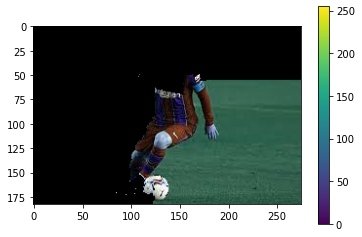

In [11]:
# img = cv.imread('mypic.jpg')
# mask = np.zeros(img.shape[:2],np.uint8)

# bgdModel = np.zeros((1,65),np.float64)
# fgdModel = np.zeros((1,65),np.float64)

# rect = (161,79,150,150)
# cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
# mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
# img = img*mask2[:,:,np.newaxis]

# plt.imshow(img)
# plt.colorbar()
# plt.show()
img = cv.imread('images.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img)
plt.colorbar()
plt.show()

In [23]:
img = cv.imread('opencv-corner-detection-sample.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)
for corner in corners:
    x,y = corner.ravel()
    cv.circle(img,(x,y),3,255,-1)
    
cv.imshow('Corner',img)

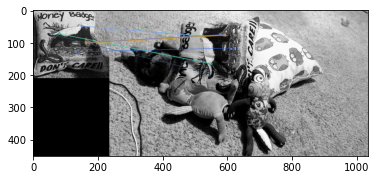

In [24]:
img1 = cv.imread('opencv-feature-matching-template.jpg',0)
img2 = cv.imread('opencv-feature-matching-image.jpg',0)
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
plt.imshow(img3)
plt.show()

In [2]:
cap = cv.VideoCapture('New video.mp4')
fgbg = cv.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
 
    cv.imshow('fgmask',frame)
    cv.imshow('frame',fgmask)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
    

cap.release()
cv.destroyAllWindows()

In [5]:
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')
cap = cv.VideoCapture(0)
while 1:
    ret, img = cap.read()
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    cv.imshow('img',img)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()